#### CNNN without Transfer Learning

In [52]:
import os
import cv2
from PIL import Image

In [53]:

def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    img = Image.open(f_path)
                    
                    img.save(f_path.replace('jpg' , 'jpeg')) 
                    os.remove(f_path)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext



In [55]:
source_dir ='C:\\Users\\maitreyee\\Documents\\course_material\\capstone\\disney_character\\disney_character\\princess'
good_exts=[ 'png', 'jpeg' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  Alice
processing class directory  Amber
processing class directory  Anastasia
processing class directory  Anna
processing class directory  Ariel
processing class directory  aurora
processing class directory  Belle
processing class directory  Cindrella
processing class directory  Elena
processing class directory  Elsa
processing class directory  Esmeralda
processing class directory  JanePorter
processing class directory  Jasmine
processing class directory  Merida
processing class directory  Moana
processing class directory  Mulan
processing class directory  Pocahontas
processing class directory  Rapunzel
processing class directory  snowWhite
processing class directory  Tiana
processing class directory  TinkerBell
 no improper image files were found


In [56]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [57]:
# from keras_preprocessing.image import ImageDataGenerator
# #from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
# from keras.layers import Conv2D, MaxPooling2D
# from keras import regularizers, optimizers
# from keras.preprocessing.image import img_to_array
# from sklearn.utils import shuffle
# #tf.losses.softmax_cross_entropy
# import pandas as pd
# import numpy as np
# import pandas as pd
# #import zipfile
# from keras.preprocessing.image import load_img
# import warnings
# import numpy as np
# from keras.preprocessing.image import img_to_array
# from numpy import load
# import tensorflow as tf
# #from google.colab import drive

In [58]:
import pathlib



In [59]:
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path("C:\\Users\\maitreyee\\Documents\\course_material\\capstone\\disney_character\\disney_character\\princess")

In [60]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

158


In [61]:
Alice = list(data_dir.glob('Alice/*'))

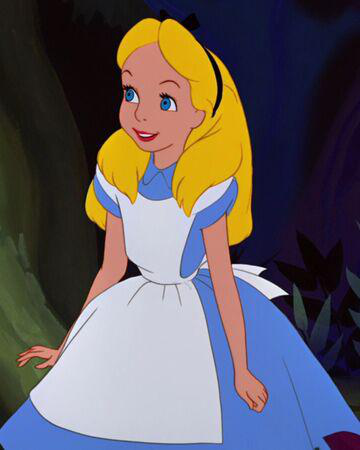

In [62]:
PIL.Image.open(str(Alice[0]))

In [63]:
batch_size = 20
img_height = 180
img_width = 180

In [64]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 158 files belonging to 21 classes.
Using 127 files for training.


In [65]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 158 files belonging to 21 classes.
Using 31 files for validation.


In [66]:
class_names = train_ds.class_names
print(class_names)

['Alice', 'Amber', 'Anastasia', 'Anna', 'Ariel', 'Belle', 'Cindrella', 'Elena', 'Elsa', 'Esmeralda', 'JanePorter', 'Jasmine', 'Merida', 'Moana', 'Mulan', 'Pocahontas', 'Rapunzel', 'Tiana', 'TinkerBell', 'aurora', 'snowWhite']


<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>


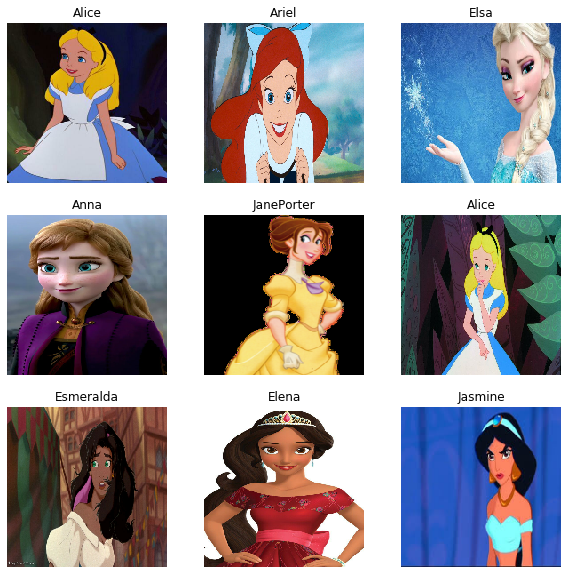

In [67]:
import matplotlib.pyplot as plt


print(train_ds)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    
    
    
    for i in range(9):
        
        #print(class_names[labels[i]])
        
          
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [68]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

### Create Model

In [69]:
num_classes = 22

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [71]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
7/7 [==============================] - 4s 358ms/step - loss: 3.2009 - accuracy: 0.0537 - val_loss: 3.1017 - val_accuracy: 0.0323
Epoch 2/50
7/7 [==============================] - 3s 338ms/step - loss: 2.9189 - accuracy: 0.1047 - val_loss: 3.1704 - val_accuracy: 0.0968
Epoch 3/50
7/7 [==============================] - 3s 337ms/step - loss: 2.5013 - accuracy: 0.3541 - val_loss: 2.9138 - val_accuracy: 0.2258
Epoch 4/50
7/7 [==============================] - 3s 341ms/step - loss: 1.6713 - accuracy: 0.6792 - val_loss: 3.7777 - val_accuracy: 0.0645
Epoch 5/50
7/7 [==============================] - 3s 348ms/step - loss: 0.9974 - accuracy: 0.6943 - val_loss: 2.8189 - val_accuracy: 0.2258
Epoch 6/50
7/7 [==============================] - 3s 351ms/step - loss: 0.5394 - accuracy: 0.8467 - val_loss: 3.9545 - val_accuracy: 0.2581
Epoch 7/50
7/7 [==============================] - 3s 372ms/step - loss: 0.2595 - accuracy: 0.9632 - val_loss: 3.8936 - val_accuracy: 0.1613
Epoch 8/50
7/7 [====

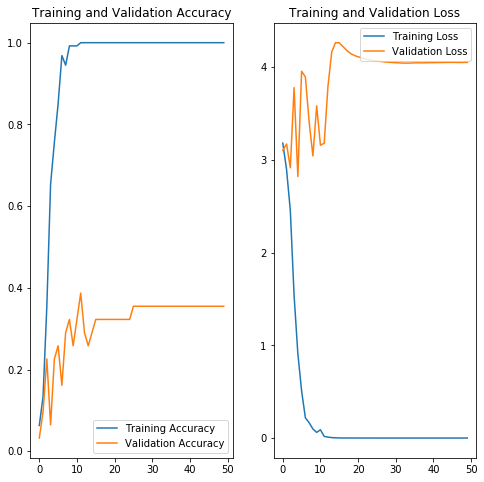

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [73]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

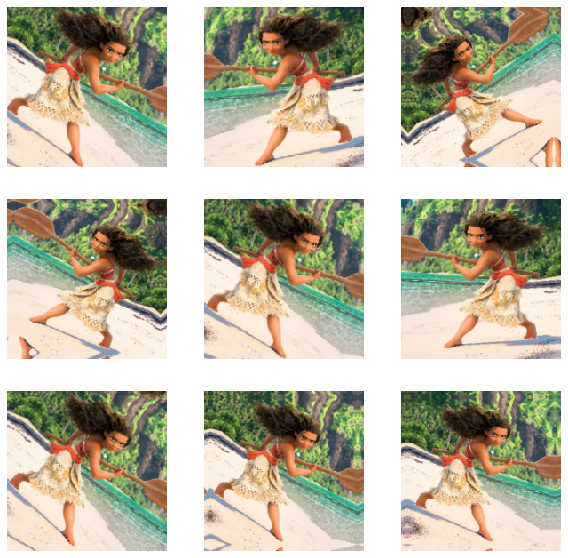

In [74]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [75]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [76]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)       

In [78]:
epochs = 200
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/200
7/7 [==============================] - 5s 451ms/step - loss: 3.5397 - accuracy: 0.0434 - val_loss: 3.0862 - val_accuracy: 0.0323
Epoch 2/200
7/7 [==============================] - 4s 420ms/step - loss: 3.0533 - accuracy: 0.1342 - val_loss: 3.0518 - val_accuracy: 0.0645
Epoch 3/200
7/7 [==============================] - 4s 430ms/step - loss: 2.9626 - accuracy: 0.1419 - val_loss: 2.9104 - val_accuracy: 0.0645
Epoch 4/200
7/7 [==============================] - 3s 408ms/step - loss: 2.6654 - accuracy: 0.2302 - val_loss: 2.8258 - val_accuracy: 0.1290
Epoch 5/200
7/7 [==============================] - 3s 418ms/step - loss: 2.3760 - accuracy: 0.2997 - val_loss: 3.0809 - val_accuracy: 0.0645
Epoch 6/200
7/7 [==============================] - 4s 476ms/step - loss: 1.9014 - accuracy: 0.4260 - val_loss: 2.5083 - val_accuracy: 0.2581
Epoch 7/200
7/7 [==============================] - 4s 472ms/step - loss: 1.7150 - accuracy: 0.5375 - val_loss: 2.7560 - val_accuracy: 0.2258
Epoch 8/200
7

Epoch 59/200
7/7 [==============================] - 4s 449ms/step - loss: 0.0415 - accuracy: 0.9769 - val_loss: 4.6271 - val_accuracy: 0.4194
Epoch 60/200
7/7 [==============================] - 4s 445ms/step - loss: 0.0202 - accuracy: 0.9957 - val_loss: 4.5364 - val_accuracy: 0.4194
Epoch 61/200
7/7 [==============================] - 4s 445ms/step - loss: 0.0234 - accuracy: 0.9942 - val_loss: 4.6834 - val_accuracy: 0.3871
Epoch 62/200
7/7 [==============================] - 4s 445ms/step - loss: 0.0274 - accuracy: 0.9890 - val_loss: 4.9613 - val_accuracy: 0.3871
Epoch 63/200
7/7 [==============================] - 4s 449ms/step - loss: 0.0244 - accuracy: 0.9970 - val_loss: 4.8083 - val_accuracy: 0.4516
Epoch 64/200
7/7 [==============================] - 4s 448ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 4.3771 - val_accuracy: 0.4516
Epoch 65/200
7/7 [==============================] - 4s 446ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 4.2746 - val_accuracy: 0.4516
Epoch 

7/7 [==============================] - 4s 451ms/step - loss: 6.9923e-04 - accuracy: 1.0000 - val_loss: 5.5726 - val_accuracy: 0.4516
Epoch 117/200
7/7 [==============================] - 4s 446ms/step - loss: 7.1474e-04 - accuracy: 1.0000 - val_loss: 5.5150 - val_accuracy: 0.4516
Epoch 118/200
7/7 [==============================] - 4s 445ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 5.4116 - val_accuracy: 0.4516
Epoch 119/200
7/7 [==============================] - 4s 444ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 5.3748 - val_accuracy: 0.4839
Epoch 120/200
7/7 [==============================] - 4s 451ms/step - loss: 5.3941e-04 - accuracy: 1.0000 - val_loss: 5.3612 - val_accuracy: 0.4839
Epoch 121/200
7/7 [==============================] - 4s 470ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 5.2950 - val_accuracy: 0.4839
Epoch 122/200
7/7 [==============================] - 4s 446ms/step - loss: 7.1924e-04 - accuracy: 1.0000 - val_loss: 5.2654 - val_accuracy: 0.51

7/7 [==============================] - 4s 478ms/step - loss: 0.0221 - accuracy: 0.9891 - val_loss: 5.9198 - val_accuracy: 0.4194
Epoch 173/200
7/7 [==============================] - 4s 447ms/step - loss: 0.0556 - accuracy: 0.9842 - val_loss: 5.5488 - val_accuracy: 0.4839
Epoch 174/200
7/7 [==============================] - 4s 434ms/step - loss: 0.0262 - accuracy: 0.9957 - val_loss: 5.6622 - val_accuracy: 0.4194
Epoch 175/200
7/7 [==============================] - 4s 438ms/step - loss: 0.0468 - accuracy: 0.9827 - val_loss: 6.3780 - val_accuracy: 0.4839
Epoch 176/200
7/7 [==============================] - 4s 453ms/step - loss: 0.1100 - accuracy: 0.9551 - val_loss: 6.1873 - val_accuracy: 0.4516
Epoch 177/200
7/7 [==============================] - 4s 463ms/step - loss: 0.0751 - accuracy: 0.9548 - val_loss: 6.0703 - val_accuracy: 0.4516
Epoch 178/200
7/7 [==============================] - 4s 455ms/step - loss: 0.1952 - accuracy: 0.9335 - val_loss: 6.3147 - val_accuracy: 0.4839
Epoch 179/200

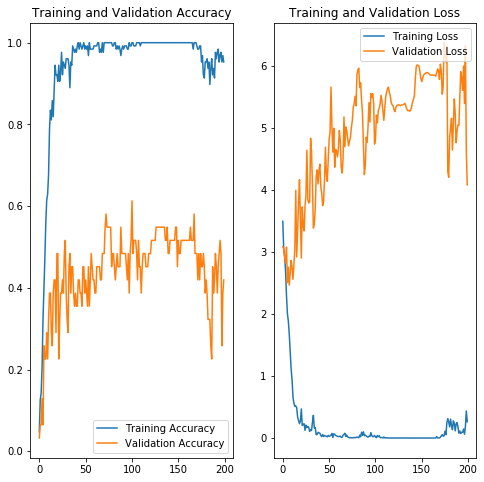

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()